In [1]:
import json
import re
from konlpy.tag import Okt
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud

In [2]:
inputFileName = '월드컵_naver_news'
data = json.loads(open(inputFileName+'.json', 'r', encoding = 'utf8').read())
data #출력하여 내용 확인

[{'description': '프랑스와 모로코의 비자 분쟁 종식은 프랑스가 지난 14일 2022 <b>월드컵</b> 4강전에서 모로코를 2대 0으로 제압한 지 이틀 만에 나왔다. 에마뉘엘 마크롱 프랑스 대통령은 2022 <b>월드컵</b> 준결승전이 끝난 뒤 모하메드 6세 모로코... '},
 {'description': '<b>월드컵</b> 결승전은 국가대표팀과 작별 무대&quot;라고 밝혔다. 디 마리아가 2022 국제축구연맹(FIFA) 카타르<b>월드컵</b>을 끝으로 대표팀에서 은퇴하는 건 이미 알려진 얘기다. 지난 3월 <b>월드컵</b> 남미예선 베네수엘라와 홈경기를 마치고... '},
 {'description': '하지만 브라질 국가대표로 나선 ‘2022 국제축구연맹(FIFA) 카타르 <b>월드컵</b>’에서는 맹활약을 펼쳤다.... ‘풋볼 인사이더’의 전문가는 “토트넘은 <b>월드컵</b>에서 히샬리송의 모습을 지켜본 후 활용법을 끌어올리기 위한... '},
 {'description': '토트넘에게 2022 카타르 <b>월드컵</b>이 치명적이 되고 있다. 풋볼런던은 17일(현지시간) 히샬리송의 햄스트링 부상... 여기에, 안와 골절 수술 후 안면 보호 마스크를 쓰고 <b>월드컵</b> 출전을 강행한 손흥민도 정상이 아니다.... '},
 {'description': '이번 시즌은 2022 국제축구연맹(FIFA) 카타르 <b>월드컵</b>으로 인해 11월 중순부터 약 한 달 동안 휴식기가... 파리FC와의 경기에서는 <b>월드컵</b>에 차출되지 않았던 선수들과 유스 선수들이 대거 출전했다. 헤나투 산체스... '},
 {'description': '이에 위기의 판을 뒤집기 위한 카드로 <b>월드컵</b>을 떠올리는 진도준의 모습은 또 한 번의 짜릿한 역전을 예고하며 기대감을 증폭시켰다. 한편, 교통사고를 조작한 배후도 밝혀졌다. 그는 진양철의 아내 이필옥이었다. 자신의... '},
 {'description': '미국의 한 시민이 18일(

In [3]:
message = ''
for item in data:
    if 'title' in item.keys():
        message = message + re.sub(r'[^\w]', ' ', item['description']) +''
message #출력하여 내용 확인

''

In [7]:
nlp = Okt()
message_N = nlp.nouns(message)
message_N #출력하여 내용 확인

JVMNotFoundException: No JVM shared library file (jvm.dll) found. Try setting up the JAVA_HOME environment variable properly.

In [5]:
count = Counter(message_N)
count #출력하여 내용 확인

NameError: name 'message_N' is not defined

In [6]:
word_count = dict() 
for tag, counts in count.most_common(80): 
    if(len(str(tag))>1): 
        word_count[tag] = counts 
        print("%s : %d" % (tag, counts))

NameError: name 'count' is not defined

In [12]:
font_path = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
matplotlib.rc('font', family = font_name)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


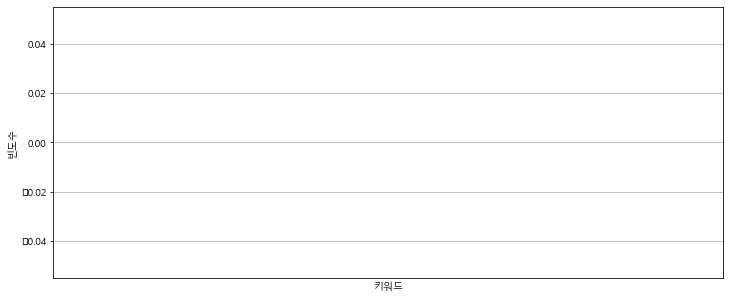

In [13]:
plt.figure(figsize = (12, 5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)
sorted_Keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count.values(), reverse = True)
plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = '75')
plt.show()


In [14]:
wc = WordCloud(font_path, background_color = 'ivory', width = 800, height = 600)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize = (8, 8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

ValueError: We need at least 1 word to plot a word cloud, got 0.